<a href="https://colab.research.google.com/github/SimGonsalves30/SPAM/blob/main/SPAM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAM Classification using ML models

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **DATA PREPROCESSING**

As the first step, after importing and loading the dataset, the 3 unnamed columns are removed as they do not contain any value and will be only noise to the model. Then the remaining 2 columns v1 and v2 are renamed as Label and SMS respectively.

In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"Label", "v2":"SMS"})
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print (len(df))

5572


The SMS spam dataset has 4825 ham messages and 747 spam messages.

In [ ]:
#Number of observations in spam and ham
df.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

The describe () method in the table provides a summary statistic for the dataset. There are two unique labels (ham, spam) and 5169 unique messages that indicates that some messages are repeated. The top label is “ham” and the top message in the data is “Sorry, I’ll call later”.

In [ ]:
df.describe()

,Label,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


As the target class must be numerical for classification models, the 2 class labels are mapped as 1 and 0 for "spam" and "ham".
Further, an extra feature is added to find out the length of the messages.

In [ ]:
df['spam/ham'] = df.Label.map({'ham':0, 'spam':1})
df = df[['Label', 'SMS', 'spam/ham']]
df.head()

,Label,SMS,spam/ham
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df['length'] = df['SMS'].apply(len)
df.head()

,Label,SMS,spam/ham,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


## **DATA VISUALIZATION**

Below, the bar chart shows that out of the 2 class labels the ham messages are the most frequent than the spam messages.

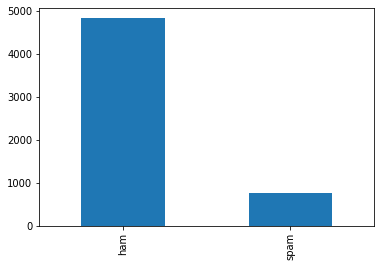

In [ ]:
df.Label.value_counts().plot.bar()

In [ ]:
#for counting frequently occurence of spam and ham.
from collections import Counter
count1 = Counter(" ".join(df[df['Label']=='ham']["SMS"]).split()).most_common(20)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(df[df['Label']=='spam']["SMS"]).split()).most_common(20)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

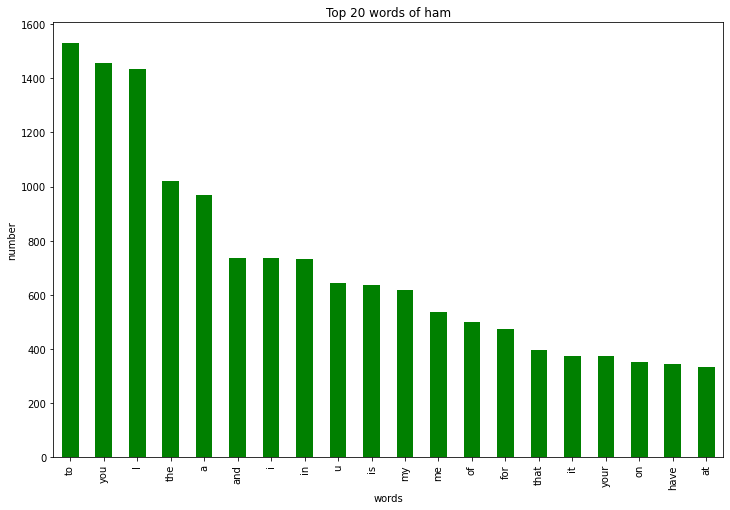

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

data1.plot.bar(legend = False, color = 'green',figsize = (12,8))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 20 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()



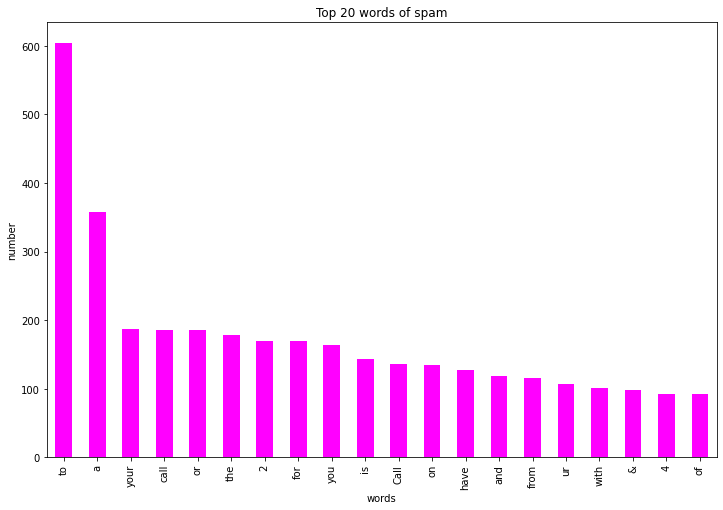

In [ ]:
data2.plot.bar(legend = False, color = 'fuchsia', figsize = (12,8))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 20 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Here the most common words in spam messages are “Free”, “text”, “call”, and the most common words in ham messages are, “will”, “got” “ok”.

# **WORDCLOUD**

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)


In [ ]:
data_ham  = df[df['spam/ham'] == 0].copy()
data_spam = df[df['spam/ham'] == 1].copy()


In [ ]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['SMS'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white' ,
                colormap=matplotlib.cm.inferno, width=800, height=600).generate(text)

    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

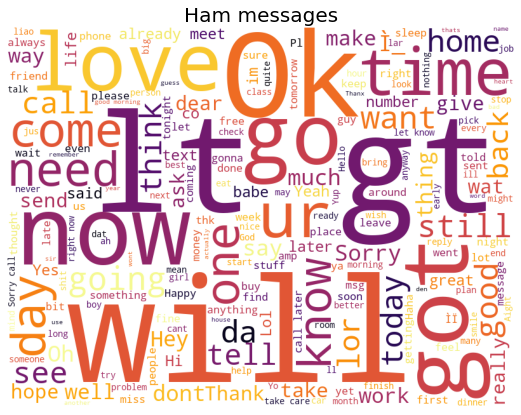

In [ ]:
show_wordcloud(data_ham, "Ham messages")


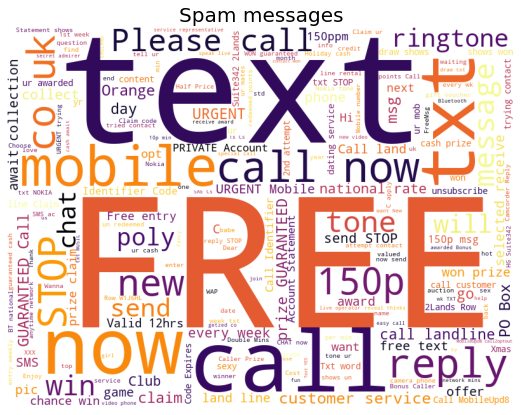

In [ ]:
show_wordcloud(data_spam, "Spam messages")

## **TRAIN TEST SPLIT**

BAG OF WORDS MODEL

We use the bag of words approach to represent the text data into numerical feature vectors. In this approach, we use the tokenized words for each observation and find out the frequency of each token.
The CountVectorizer() method is used for implementation of bag of words which converts a collection of text documents to a matrix of token counts by,
1. Converting strings to lower case form
2. Removing all punctuations
3. Tokenization
4. Counting the frequencies

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['SMS'],
                                                    df['Label'],test_size=0.20,
                                                    random_state=1)
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix.
testing_data = count_vector.transform(X_test)

The dataset is then split into training and testing data in the proportion 80:20. The CountVectorizer() method was used for cleaning the data.


# **NAIVE BAYES CLASSIFICATION**

The Naïve Bayes classification algorithm is used to get the best accuracy of the SMS Spam dataset. The Naïve Bayes classification model works well for text documents since the words in the text document are independent of each other. Thus, satisfying the assumption of Naïve Bayes model. sklearn.naive_bayes method is used to predict whether the messages are spam or not. Here, Multinomial Naive Bayes classifier is implemented instead of Gaussian Naïve Bayes as it is suitable for text classification.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
NB_model=clf.fit(training_data,y_train)
pred = clf.predict(testing_data)
print('Accuracy score for Naive Bayes: {}'.format(accuracy_score(y_test, pred)))

Accuracy score for Naive Bayes: 0.9847533632286996


Text(91.68, 0.5, 'predicted class')

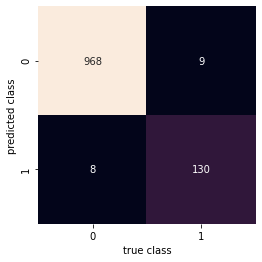

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as pt
from sklearn.metrics import classification_report,confusion_matrix
conmat=confusion_matrix(y_test,pred)
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False)
pt.xlabel('true class')
pt.ylabel('predicted class')

**Accuracy score for Naive Bayes: 0.9847533632286996**

# **DECISION TREE**

The Decision tree algorithm is a classification algorithm which is used to the predict the value of the target variable. DecisionTreeClassifier() is used for this prediction.

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf1 = tree.DecisionTreeClassifier()
DT_model=clf1.fit(training_data,y_train)
pred1 = clf1.predict(testing_data)
print('Accuracy score for Decision tree: {}'.format(accuracy_score(y_test, pred1)))


Accuracy score for Decision tree: 0.9695067264573991


Text(91.68, 0.5, 'predicted class')

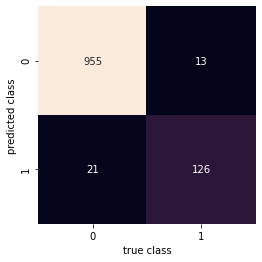

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as pt
from sklearn.metrics import classification_report,confusion_matrix
conmat=confusion_matrix(y_test,pred1)
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False)
pt.xlabel('true class')
pt.ylabel('predicted class')

**Accuracy score for Decision tree: 0.9695067264573991**

Detection of spam is very important for securing messages and e-mails. To detect the spam accurately and efficiently, a method has been proposed for spam detection using two Classification models – Naïve Bayes and Decision Tree. The results obtained in the above table show that the Naïve Bayes Model has a high capability to detect spam.

# **THE END**